# AON Study Figures
Author: Olaf Borghi olafborghi@gmail.com

## Prepare Setup

### Define fixed parameters, load libraries/modules

**Load modules**

In [1]:
# Import necessary packages and modules
%matplotlib inline
# libraries
import os
import numpy as np
import nibabel as nib
import pandas as pd
import nilearn as nl
from matplotlib import pyplot as plt
# specific modules
from nilearn import plotting, datasets, image
from nilearn.image import math_img
from nilearn import surface
from pathlib import Path
from pprint import pprint
from atlasreader import get_statmap_info
print(nl.__version__) # print nilearn version

The Python package you are importing, AtlasReader, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using AtlasReader, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data

0.9.2


**Set fixed parameters**

In [2]:
# fixed folders
basedir = Path("/home/olafb99/mnt/a471/userdata/olafb99/shared/03_AON_ACTION/")
outputdir = Path(basedir / "derivatives")
datadir = Path(basedir / "01_data")
first_level_dir = first_level_dir = outputdir / "first_level"
action_first_level_dir = first_level_dir / "action-task"
AON_first_level_dir = first_level_dir / "AON-task"
masks_templates_dir = outputdir / "masks_templates"
second_level_dir = outputdir / "second_level"
AON_second_level_dir = second_level_dir / "AON-task"
action_second_level_dir = second_level_dir / "action-task"
atlas_dir = outputdir / "brain_atlases"
roi_dir = masks_templates_dir / "ROI_masks"
plot_dir = second_level_dir / "plots"

# make folder to store surf mesh
if not os.path.exists(masks_templates_dir / "surf_mesh"):
    os.makedirs(masks_templates_dir / "surf_mesh")
surf_dir = masks_templates_dir / "surf_mesh"

# load the MNI template
template = datasets.load_mni152_template(resolution=1)

**Download surf mesh**

In [3]:
fsaverage = datasets.fetch_surf_fsaverage(mesh='fsaverage6', data_dir=surf_dir)

# bg for right hemisphere
curv_right = surface.load_surf_data(fsaverage.curv_right)
curv_right_sign = np.sign(curv_right)

# bg for left hemisphere
curv_left = surface.load_surf_data(fsaverage.curv_left)
curv_left_sign = np.sign(curv_left)

**Load thresholded images for the plots**

In [4]:
# AON > baseline
aon_thresholded_map = AON_second_level_dir / "AON-baseline_z_map_threshold.nii.gz"
aon_cluster_threshold = 223
aon_thresholded_map = image.threshold_img(aon_thresholded_map, threshold=0, cluster_threshold=aon_cluster_threshold)
# scrambled > baseline
scrambled_thresholded_map = AON_second_level_dir / "scrambled-baseline_z_map_threshold.nii.gz"
scrambled_cluster_threshold = 191
scrambled_thresholded_map = image.threshold_img(scrambled_thresholded_map, threshold=0, cluster_threshold=scrambled_cluster_threshold)
# ghost > baseline
ghost_thresholded_map = AON_second_level_dir / "ghost-baseline_z_map_threshold.nii.gz"
ghost_cluster_threshold = 188
ghost_thresholded_map = image.threshold_img(ghost_thresholded_map, threshold=0, cluster_threshold=ghost_cluster_threshold)
# transitive > intransitive
transitive_intransitive_thresholded_map = AON_second_level_dir / "transitive-intransitive_z_map_threshold.nii.gz"
transitive_intransitive_cluster_threshold = 62
transitive_intransitive_thresholded_map = image.threshold_img(transitive_intransitive_thresholded_map, threshold=0, cluster_threshold=transitive_intransitive_cluster_threshold)
# intransitive > transitive
intransitive_transitive_thresholded_map = AON_second_level_dir / "intransitive-transitive_z_map_threshold.nii.gz"
intransitive_transitive_cluster_threshold = 62
intransitive_transitive_thresholded_map = image.threshold_img(intransitive_transitive_thresholded_map, threshold=0, cluster_threshold=intransitive_transitive_cluster_threshold)
# human > dog
human_dog_thresholded_map = AON_second_level_dir / "human-dog_z_map_threshold.nii.gz"
human_dog_cluster_threshold = 163
human_dog_thresholded_map = image.threshold_img(human_dog_thresholded_map, threshold=0, cluster_threshold=human_dog_cluster_threshold)
# dog > human
dog_human_thresholded_map = AON_second_level_dir / "dog-human_z_map_threshold.nii.gz"
dog_human_cluster_threshold = 163
dog_human_thresholded_map = image.threshold_img(dog_human_thresholded_map, threshold=0, cluster_threshold=dog_human_cluster_threshold)
# dog ghost > human ghost
dog_ghost_thresholded_map = AON_second_level_dir / "dog_ghost-human_ghost_z_map_threshold.nii.gz"
dog_ghost_cluster_threshold = 74
dog_ghost_thresholded_map = image.threshold_img(dog_ghost_thresholded_map, threshold=0, cluster_threshold=dog_ghost_cluster_threshold)
# human ghost > dog ghost
human_ghost_thresholded_map = AON_second_level_dir / "human_ghost-dog_ghost_z_map_threshold.nii.gz"
human_ghost_cluster_threshold = 74
human_ghost_thresholded_map = image.threshold_img(human_ghost_thresholded_map, threshold=0, cluster_threshold=human_ghost_cluster_threshold)
# dog scrambled > baseline
dog_scrambled_thresholded_map = AON_second_level_dir / "dog_scrambled-baseline_z_map_threshold.nii.gz"
dog_scrambled_cluster_threshold = 159
dog_scrambled_thresholded_map = image.threshold_img(dog_scrambled_thresholded_map, threshold=0, cluster_threshold=dog_scrambled_cluster_threshold)
# human scrambled > baseline
human_scrambled_thresholded_map = AON_second_level_dir / "human_scrambled-baseline_z_map_threshold.nii.gz"
human_scrambled_cluster_threshold = 181
human_scrambled_thresholded_map = image.threshold_img(human_scrambled_thresholded_map, threshold=0, cluster_threshold=human_scrambled_cluster_threshold)
# dog scrambled > human scrambled
dog_scrambled_human_scrambled_thresholded_map = AON_second_level_dir / "dog_scrambled-human_scrambled_z_map_threshold.nii.gz"
dog_scrambled_human_scrambled_cluster_threshold = 67
dog_scrambled_human_scrambled_thresholded_map = image.threshold_img(dog_scrambled_human_scrambled_thresholded_map, threshold=0, cluster_threshold=dog_scrambled_human_scrambled_cluster_threshold)
# human scrambled > dog scrambled 
human_scrambled_dog_scrambled_thresholded_map = AON_second_level_dir / "human_scrambled-dog_scrambled_z_map_threshold.nii.gz"
human_scrambled_dog_scrambled_cluster_threshold = 67
human_scrambled_dog_scrambled_thresholded_map = image.threshold_img(human_scrambled_dog_scrambled_thresholded_map, threshold=0, cluster_threshold=human_scrambled_dog_scrambled_cluster_threshold)
# action > baseline
action_thresholded_map = action_second_level_dir / "action-baseline_z_map_threshold.nii.gz"
action_cluster_threshold = 274
action_thresholded_map = image.threshold_img(action_thresholded_map, threshold=0, cluster_threshold=action_cluster_threshold)

## Figure 2 (Surface Plots)

1.	All action > baseline
2.	All scrambled > baseline 
3.	All ghost > baseline 

All action observation > baseline

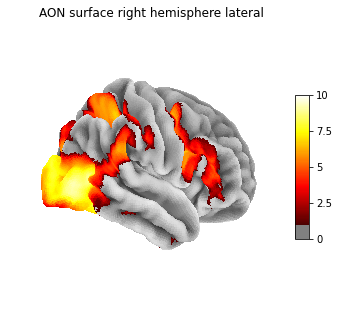

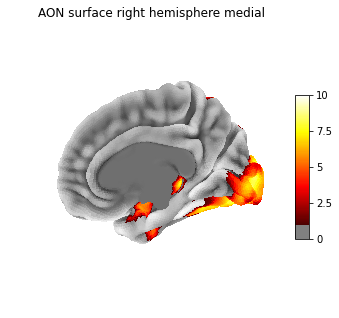

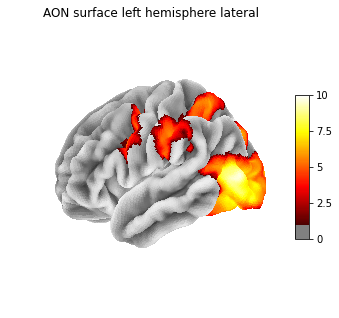

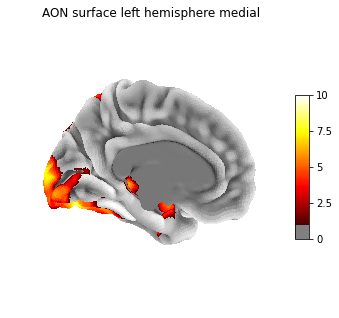

In [5]:
# sample the stat maps around freesurfer mesh
aon_texture_r = surface.vol_to_surf(aon_thresholded_map, fsaverage.pial_right)
aon_texture_l = surface.vol_to_surf(aon_thresholded_map, fsaverage.pial_left)

## create the plots
# right hemi
aon_texture_fig_right_lateral = plotting.plot_surf_stat_map(
    fsaverage.pial_right, aon_texture_r, hemi='right', view='lateral',
    title='AON surface right hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
aon_texture_fig_right_medial = plotting.plot_surf_stat_map(
    fsaverage.pial_right, aon_texture_r, hemi='right', view='medial',
    title='AON surface right hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)

# left hemi
aon_texture_fig_left_lateral = plotting.plot_surf_stat_map(
    fsaverage.pial_left, aon_texture_l, hemi='left', view='lateral',
    title='AON surface left hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)
aon_texture_fig_left_medial = plotting.plot_surf_stat_map(
    fsaverage.pial_left, aon_texture_l, hemi='left', view='medial',
    title='AON surface left hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)

# show the figures
aon_texture_fig_right_lateral.show()
aon_texture_fig_right_medial.show()
aon_texture_fig_left_lateral.show()
aon_texture_fig_left_medial.show()

# save the figures locally
aon_texture_fig_right_lateral.savefig(plot_dir / 'aon_texture_fig_right_lateral')
aon_texture_fig_right_medial.savefig(plot_dir / 'aon_texture_fig_right_medial')
aon_texture_fig_left_lateral.savefig(plot_dir / 'aon_texture_fig_left_lateral')
aon_texture_fig_left_medial.savefig(plot_dir / 'aon_texture_fig_left_medial')

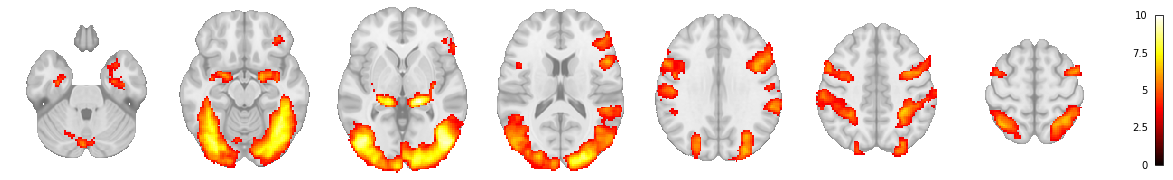

In [6]:
aon_z_fig = plotting.plot_stat_map(aon_thresholded_map, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmax=10, annotate=False)

aon_z_fig.savefig(plot_dir / 'aon_z_fig')

Scrambled > baseline

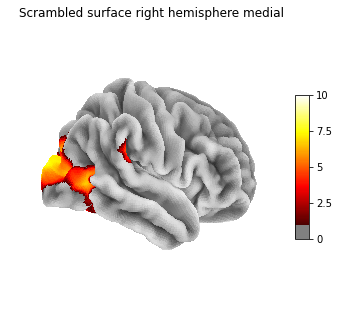

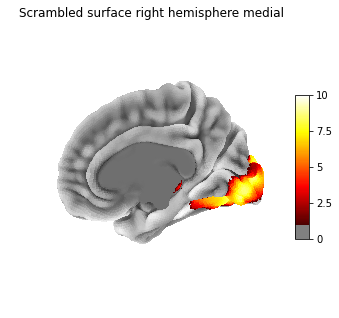

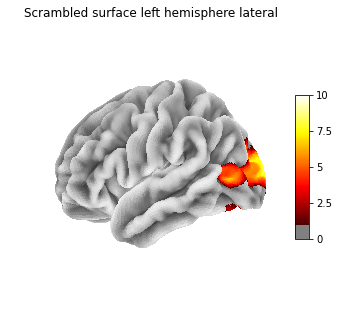

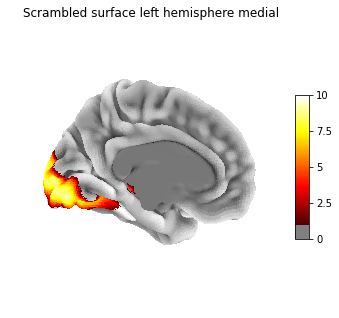

In [7]:
# sample the stat maps around freesurfer mesh
scrambled_texture_r = surface.vol_to_surf(scrambled_thresholded_map, fsaverage.pial_right)
scrambled_texture_l = surface.vol_to_surf(scrambled_thresholded_map, fsaverage.pial_left)

## create the plots
# right hemi
scrambled_texture_fig_right_lateral = plotting.plot_surf_stat_map(
    fsaverage.pial_right, scrambled_texture_r, hemi='right', view='lateral',
    title='Scrambled surface right hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
scrambled_texture_fig_right_medial = plotting.plot_surf_stat_map(
    fsaverage.pial_right, scrambled_texture_r, hemi='right', view='medial',
    title='Scrambled surface right hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
# left hemi
scrambled_texture_fig_left_lateral = plotting.plot_surf_stat_map(
    fsaverage.pial_left, scrambled_texture_l, hemi='left', view='lateral',
    title='Scrambled surface left hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)
scrambled_texture_fig_left_medial = plotting.plot_surf_stat_map(
    fsaverage.pial_left, scrambled_texture_l, hemi='left', view='medial',
    title='Scrambled surface left hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)

# show the figures
scrambled_texture_fig_right_lateral.show()
scrambled_texture_fig_right_medial.show()
scrambled_texture_fig_left_lateral.show()
scrambled_texture_fig_left_medial.show()

# save the figures locally
scrambled_texture_fig_right_lateral.savefig(plot_dir / 'scrambled_texture_fig_right_lateral')
scrambled_texture_fig_right_medial.savefig(plot_dir / 'scrambled_texture_fig_right_medial')
scrambled_texture_fig_left_lateral.savefig(plot_dir / 'scrambled_texture_fig_left_lateral')
scrambled_texture_fig_left_medial.savefig(plot_dir / 'scrambled_texture_fig_left_medial')

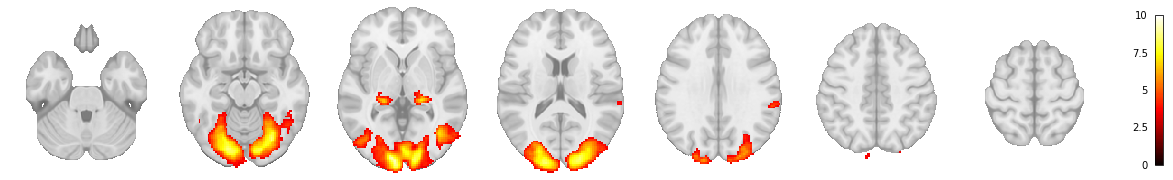

In [9]:
scrambled_z_fig = plotting.plot_stat_map(scrambled_thresholded_map, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmax=10, annotate=False)

scrambled_z_fig.savefig(plot_dir / 'scrambled_z_fig')

Ghost > baseline

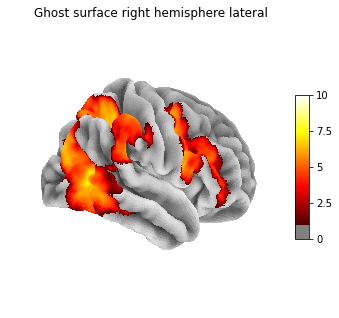

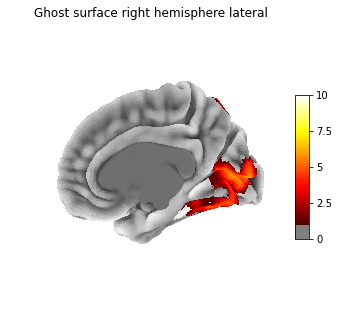

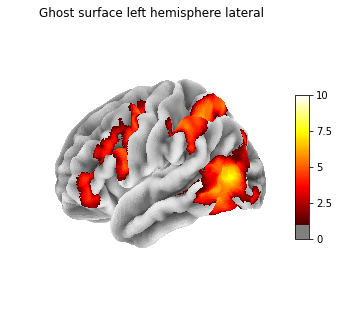

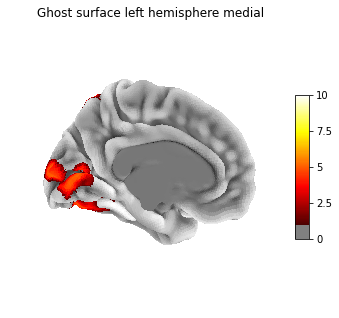

In [10]:
# sample the stat maps around freesurfer mesh
ghost_texture_r = surface.vol_to_surf(ghost_thresholded_map, fsaverage.pial_right)
ghost_texture_l = surface.vol_to_surf(ghost_thresholded_map, fsaverage.pial_left)

## create the plots
# right hemi
ghost_texture_fig_right_lateral = plotting.plot_surf_stat_map(
    fsaverage.pial_right, ghost_texture_r, hemi='right', view='lateral', 
    title='Ghost surface right hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
ghost_texture_fig_right_medial = plotting.plot_surf_stat_map(
    fsaverage.pial_right, ghost_texture_r, hemi='right', view='medial', 
    title='Ghost surface right hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
# left hemi
ghost_texture_fig_left_lateral = plotting.plot_surf_stat_map(
    fsaverage.pial_left, ghost_texture_l, hemi='left', view='lateral',
    title='Ghost surface left hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)
ghost_texture_fig_left_medial = plotting.plot_surf_stat_map(
    fsaverage.pial_left, ghost_texture_l, hemi='left', view='medial',
    title='Ghost surface left hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)

# show the figures
ghost_texture_fig_right_lateral.show()
ghost_texture_fig_right_medial.show()
ghost_texture_fig_left_lateral.show()
ghost_texture_fig_left_medial.show()

# save the figures locally
ghost_texture_fig_right_lateral.savefig(plot_dir / 'ghost_texture_fig_right_lateral')
ghost_texture_fig_right_medial.savefig(plot_dir / 'ghost_texture_fig_right_medial')
ghost_texture_fig_left_lateral.savefig(plot_dir / 'ghost_texture_fig_left_lateral')
ghost_texture_fig_left_medial.savefig(plot_dir / 'ghost_texture_fig_left_medial')

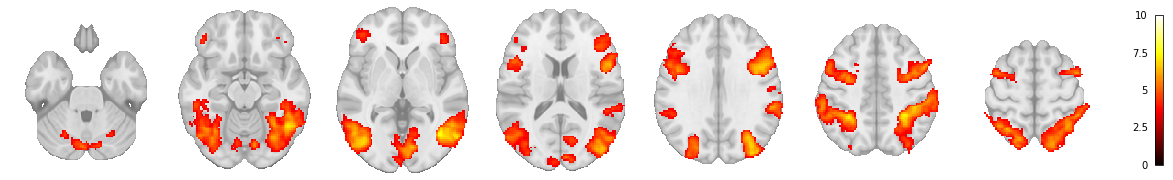

In [11]:
ghost_z_fig = plotting.plot_stat_map(ghost_thresholded_map, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmax=10, annotate=False)

ghost_z_fig.savefig(plot_dir / 'ghost_z_fig')

## Figure 3 (Glass Brain)

1.	Transitive > Intransitive
2.	Intransitive > Transitive
3.	Human > Dog
3.	Dog > Human

/usr/local/lib/python3.8/dist-packages/nilearn/plotting/displays/_slicers.py:382: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


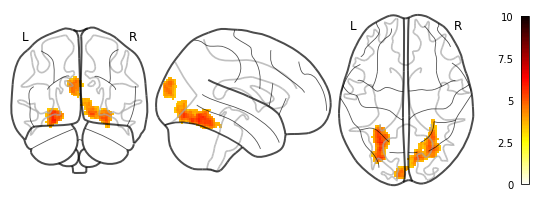

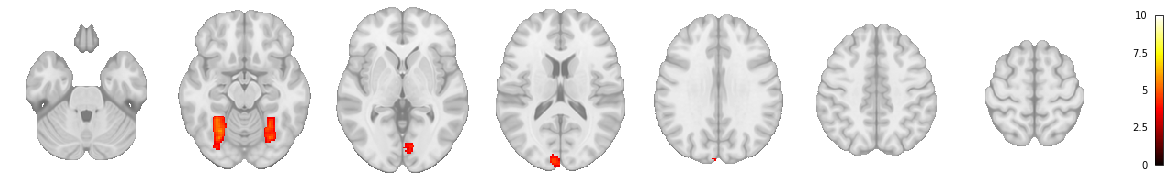

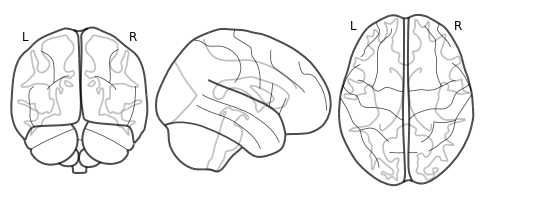

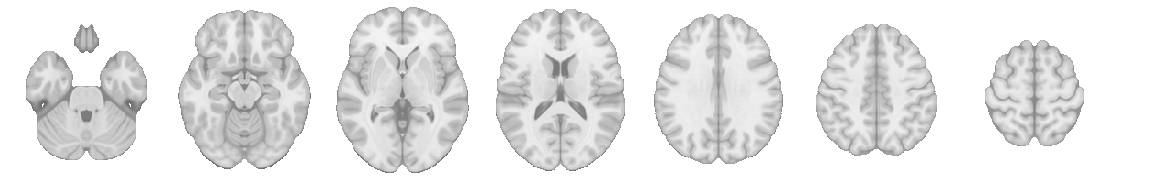

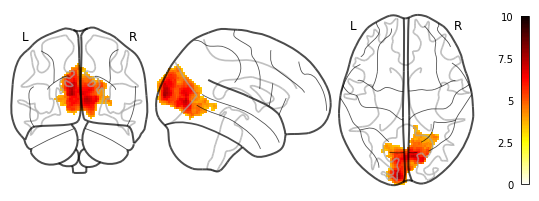

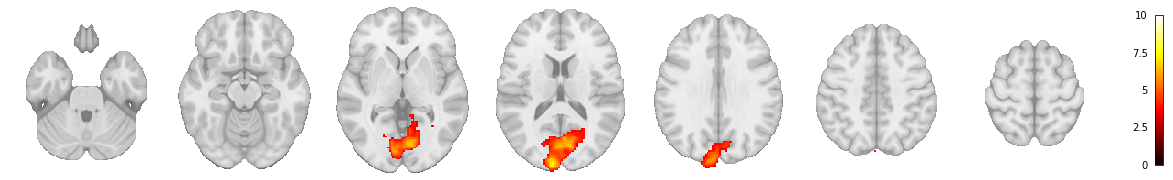

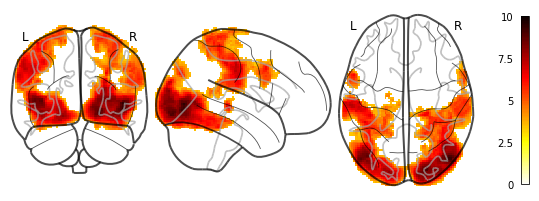

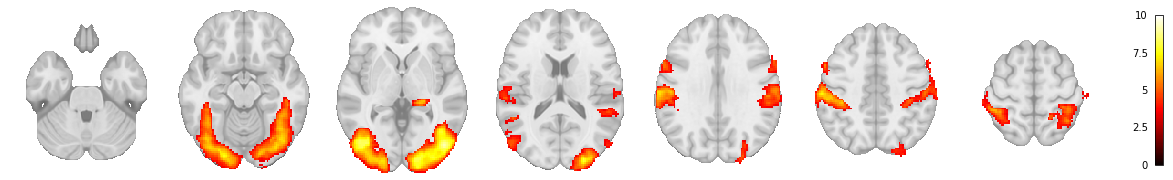

In [12]:
# transitive-intransitive
transitive_intransitive_glass_brain = plotting.plot_glass_brain(transitive_intransitive_thresholded_map, draw_cross=False, black_bg=False, colorbar=True, vmax=10)
transitive_intransitive_glass_brain.savefig(plot_dir / 'transitive_intransitive_glass_brain')

transitive_intransitive_z_fig = plotting.plot_stat_map(transitive_intransitive_thresholded_map, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmax=10, annotate=False)
transitive_intransitive_z_fig.savefig(plot_dir / 'transitive_intransitive_z_fig')

# intransitive-transitive
intransitive_transitive_glass_brain = plotting.plot_glass_brain(intransitive_transitive_thresholded_map, draw_cross=False, black_bg=False, colorbar=True, vmax=10)
intransitive_transitive_glass_brain.savefig(plot_dir / 'intransitive_transitive_glass_brain')

intransitive_transitive_z_fig = plotting.plot_stat_map(intransitive_transitive_thresholded_map, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmax=10, annotate=False)
intransitive_transitive_z_fig.savefig(plot_dir / 'intransitive_transitive_z_fig')

# human-dog
human_dog_glass_brain = plotting.plot_glass_brain(human_dog_thresholded_map, draw_cross=False, black_bg=False, colorbar=True, vmax=10)
human_dog_glass_brain.savefig(plot_dir / 'human-dog_glass_brain')

human_dog_z_fig = plotting.plot_stat_map(human_dog_thresholded_map, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmax=10, annotate=False)
human_dog_z_fig.savefig(plot_dir / 'human_dog_z_fig')

# dog-human
dog_human_glass_brain = plotting.plot_glass_brain(dog_human_thresholded_map, draw_cross=False, black_bg=False, colorbar=True, vmax=10)
dog_human_glass_brain.savefig(plot_dir / 'dog_human_glass_brain')

dog_human_z_fig = plotting.plot_stat_map(dog_human_thresholded_map, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmax=10, annotate=False)
dog_human_z_fig.savefig(plot_dir / 'dog_human_z_fig')

## Figure 4 (AON x Action Conjunction)

1.	All action > baseline 
2.	All action > baseline
3. Conjunction mask
4. Anatomical ROI mask 

In [108]:
# load some relevant brain masks
aon_mask = f"{masks_templates_dir}/AON_mask.nii.gz"
action_mask = f"{masks_templates_dir}/action_mask.nii.gz"
conjunction_mask = f"{masks_templates_dir}/conjunction_mask.nii.gz"
anat_roi_mask = f"{roi_dir}/anat_roi_mask.nii.gz"

All action > baseline

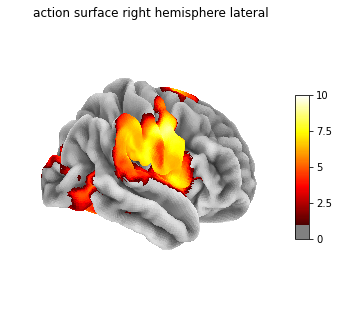

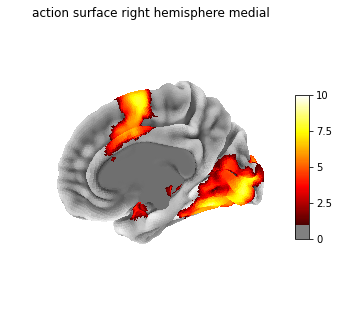

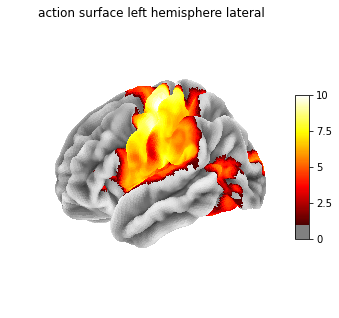

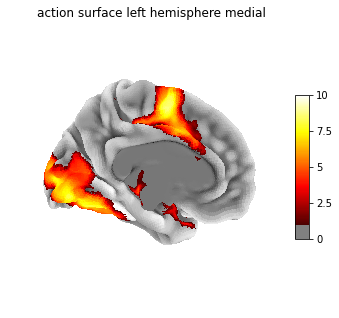

In [109]:
# sample the stat maps around freesurfer mesh
action_texture_r = surface.vol_to_surf(action_thresholded_map, fsaverage.pial_right)
action_texture_l = surface.vol_to_surf(action_thresholded_map, fsaverage.pial_left)

## create the plots
# right hemi
action_texture_fig_right_lateral = plotting.plot_surf_stat_map(
    fsaverage.pial_right, action_texture_r, hemi='right', view='lateral',
    title='action surface right hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
action_texture_fig_right_medial = plotting.plot_surf_stat_map(
    fsaverage.pial_right, action_texture_r, hemi='right', view='medial',
    title='action surface right hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)

# left hemi
action_texture_fig_left_lateral = plotting.plot_surf_stat_map(
    fsaverage.pial_left, action_texture_l, hemi='left', view='lateral',
    title='action surface left hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)
action_texture_fig_left_medial = plotting.plot_surf_stat_map(
    fsaverage.pial_left, action_texture_l, hemi='left', view='medial',
    title='action surface left hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)

# show the figures
action_texture_fig_right_lateral.show()
action_texture_fig_right_medial.show()
action_texture_fig_left_lateral.show()
action_texture_fig_left_medial.show()

# save the figures locally
action_texture_fig_right_lateral.savefig(plot_dir / 'action_texture_fig_right_lateral')
action_texture_fig_right_medial.savefig(plot_dir / 'action_texture_fig_right_medial')
action_texture_fig_left_lateral.savefig(plot_dir / 'action_texture_fig_left_lateral')
action_texture_fig_left_medial.savefig(plot_dir / 'action_texture_fig_left_medial')

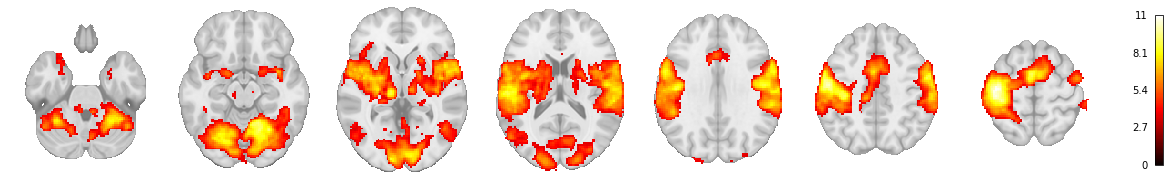

In [110]:
action_z_fig = plotting.plot_stat_map(action_thresholded_map, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, annotate=False)
action_z_fig.savefig(plot_dir / 'action_z_fig')

Conjunction action observation * action execution

I multiply the action mask by two, so that instead of one its values are 0,2 (still binary). 

In [111]:
action_mask_two = math_img("img*2", img=action_mask)

In [112]:
# quick manipulation check
action_mask_two_labels = np.unique(action_mask_two.get_fdata())
n_values_act = action_mask_two_labels.size

print(f"There are {n_values_act} different values in the mask! Check here if the mask is binary (should be 0 and 2): {action_mask_two_labels}")

There are 2 different values in the mask! Check here if the mask is binary (should be 0 and 2): [0. 2.]


Now add up the action_mask_two and the aon_mask.

This results in a final mask with the following values:
- 0 = no significant activation
- 1 = significant AON activation (violet)
- 2 = significant action activation (green)
- 3 = overlap between signficant action and AON activation (yellow)

In [113]:
conjuction_plot_mask = math_img("img1+img2", img1=aon_mask, img2=action_mask_two)

In [114]:
# quick manipulation check
conjuction_plot_mask_labels = np.unique(conjuction_plot_mask.get_fdata())
n_values_con = conjuction_plot_mask_labels.size

print(f"There are {n_values_con} different values in the mask! Check here if the mask has four discrete values (should be 0,1,2,3): {conjuction_plot_mask_labels}")

There are 4 different values in the mask! Check here if the mask has four discrete values (should be 0,1,2,3): [0. 1. 2. 3.]


/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


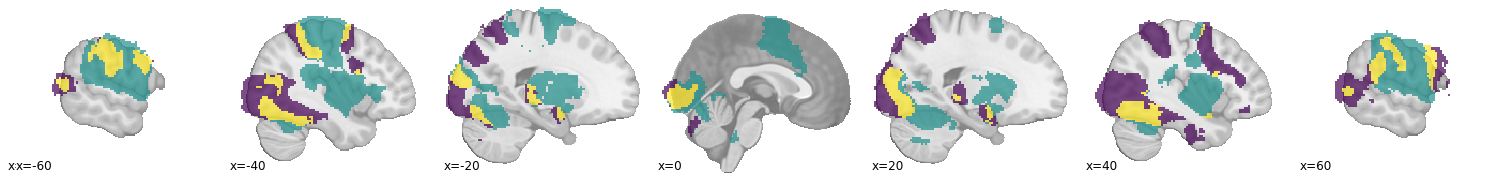

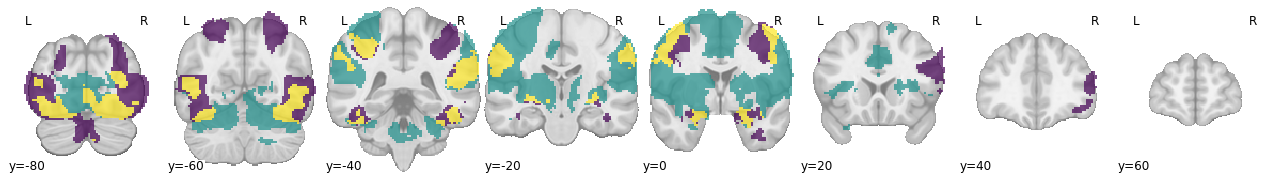

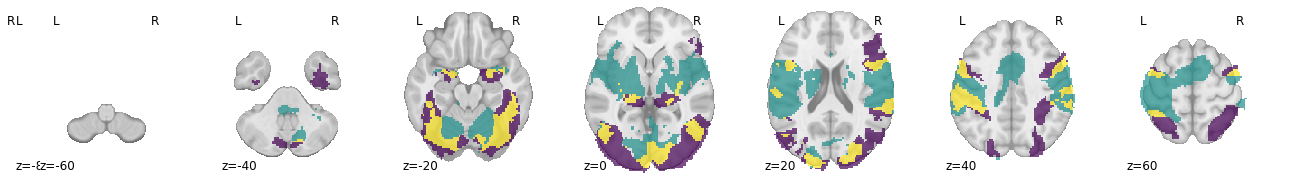

In [115]:
plotting.plot_roi(conjuction_plot_mask, display_mode = 'x', cut_coords=np.arange(-80,80,20), draw_cross=False,
                       bg_img = template, cmap="viridis", black_bg = False, alpha=.7)
plotting.plot_roi(conjuction_plot_mask, display_mode = 'y', cut_coords=np.arange(-80,80,20), draw_cross=False,
                       bg_img = template, cmap="viridis", black_bg = False, alpha=.7)
plotting.plot_roi(conjuction_plot_mask, display_mode = 'z', cut_coords=np.arange(-80,80,20), draw_cross=False,
                       bg_img = template, cmap="viridis", black_bg = False, alpha=.7)

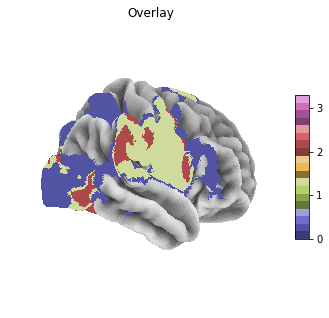

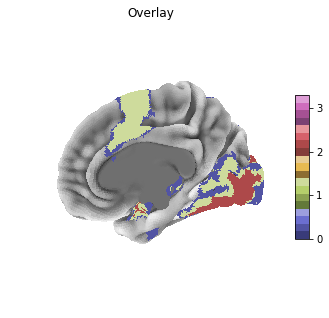

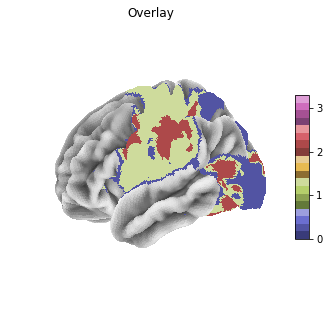

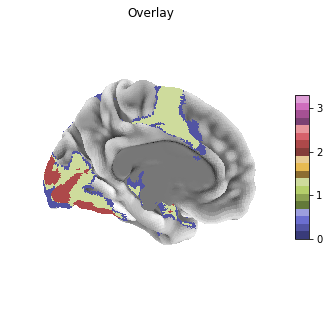

In [116]:
conjunction_texture_r = surface.vol_to_surf(conjuction_plot_mask, fsaverage.pial_right)
conjunction_texture_r = np.rint(conjunction_texture_r)
conjunction_texture_l = surface.vol_to_surf(conjuction_plot_mask, fsaverage.pial_left)
conjunction_texture_l = np.rint(conjunction_texture_l)

conjunction_texture_right_lateral = plotting.plot_surf_roi(fsaverage.pial_right, roi_map=conjunction_texture_r,
                       hemi='right', view='lateral', colorbar=True,
                       bg_map=curv_right, bg_on_data=False,
                       title="Overlay", cmap="tab20b", vmin=0.8, vmax=4.1)
conjunction_texture_right_medial = plotting.plot_surf_roi(fsaverage.pial_right, roi_map=conjunction_texture_r,
                       hemi='right', view='medial', colorbar=True,
                       bg_map=curv_right, bg_on_data=False,
                       title="Overlay", cmap="tab20b", vmin=0.8, vmax=4.1)
conjunction_texture_left_lateral = plotting.plot_surf_roi(fsaverage.pial_left, roi_map=conjunction_texture_l,
                       hemi='left', view='lateral', colorbar=True,
                       bg_map=curv_left, bg_on_data=False,
                       title="Overlay", cmap="tab20b", vmin=0.8, vmax=4.1)
conjunction_texture_left_medial = plotting.plot_surf_roi(fsaverage.pial_left, roi_map=conjunction_texture_l,
                       hemi='left', view='medial', colorbar=True,
                       bg_map=curv_left, bg_on_data=False,
                       title="Overlay", cmap="tab20b", vmin=0.8, vmax=4.1)



conjunction_texture_right_lateral.show()
conjunction_texture_left_lateral.show()
conjunction_texture_right_medial.show()
conjunction_texture_left_medial.show()

conjunction_texture_right_lateral.savefig(plot_dir / 'conjunction_texture_fig_right_lateral')
conjunction_texture_left_lateral.savefig(plot_dir / 'conjunction_texture_fig_left_lateral')
conjunction_texture_right_medial.savefig(plot_dir / 'conjunction_texture_fig_right_medial')
conjunction_texture_left_medial.savefig(plot_dir / 'conjunction_texture_fig_left_medial')

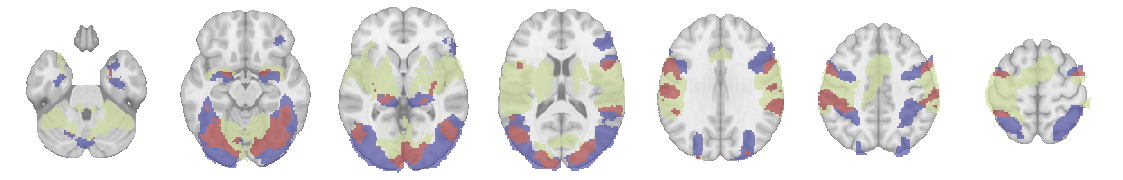

In [117]:
conjunction_z_fig = plotting.plot_roi(conjuction_plot_mask, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmin=0.8, vmax=4.1, cmap="tab20b", annotate=False)
conjunction_z_fig.savefig(plot_dir / 'conjunction_z_fig')

### Figure 5: Regions of Interest

**Action Processing ROIs**

- Left IPL AON mask
- Right IPL AON mask
- Left IFG AON mask
- Right IFG AON mask
- Left PM AON mask
- Right PM AON mask
- Left M1 AON mask
- Left S1 AON mask
- Right S1 AON mask
- Left S2 AON mask
- Right S2 AON mask

In [5]:
# all ao anatomical regions
all_aon_anat = f"{roi_dir}/anat_roi_mask.nii.gz"

# action processing region masks
left_ipl = f"{roi_dir}/left_ipl_aon_mask.nii.gz"
right_ipl = f"{roi_dir}/right_ipl_aon_mask.nii.gz"
left_ifg = f"{roi_dir}/left_ifg_aon_mask.nii.gz"
right_ifg = f"{roi_dir}/right_ifg_aon_mask.nii.gz"
left_pm = f"{roi_dir}/left_pm_aon_mask.nii.gz"
right_pm = f"{roi_dir}/right_pm_aon_mask.nii.gz"
left_m1 = f"{roi_dir}/left_m1_aon_mask.nii.gz"
left_s1 = f"{roi_dir}/left_s1_aon_mask.nii.gz"
right_s1 = f"{roi_dir}/right_s1_aon_mask.nii.gz"
left_s2 = f"{roi_dir}/left_s2_aon_mask.nii.gz"
right_s2 = f"{roi_dir}/right_s2_aon_mask.nii.gz"

**Feature Processing (Face Body) ROIs**

- Left LOC FB mask
- Right LOC FB mask
- Left Fusiform Cortex FB mask
- Right Fusiform Cortex FB mask
- Left V5 FB mask
- Right V5 FB mask
- Left pSTS FB mask
- Right pSTS FB mask


In [6]:
# all fb anatomical regions
all_fb_anat = f"{roi_dir}/fb_anat_roi_mask.nii.gz"

# feature processing region masks
left_loc = f"{roi_dir}/left_loc_fb_mask.nii.gz"
right_loc = f"{roi_dir}/right_loc_fb_mask.nii.gz"
left_fusiform = f"{roi_dir}/left_fusiform_cortex_fb_mask.nii.gz"
right_fusiform = f"{roi_dir}/right_fusiform_cortex_fb_mask.nii.gz"
left_v5 = f"{roi_dir}/left_v5_fb_mask.nii.gz"
right_v5 = f"{roi_dir}/right_v5_fb_mask.nii.gz"
left_pSTS = f"{roi_dir}/left_pSTS_fb_mask.nii.gz"
right_pSTS = f"{roi_dir}/right_pSTS_fb_mask.nii.gz"

In [7]:
all_masks = [left_ipl, right_ipl,
             left_ifg, right_ifg,
             left_pm, right_pm,
             left_m1,
             left_s1, right_s1,
             left_s2, right_s2,
             left_loc, right_loc,
             left_fusiform, right_fusiform,
             left_v5, right_v5,
             left_pSTS, right_pSTS]

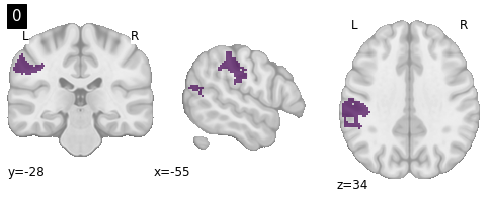

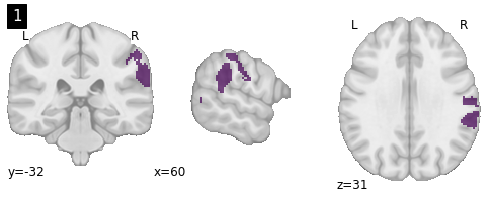

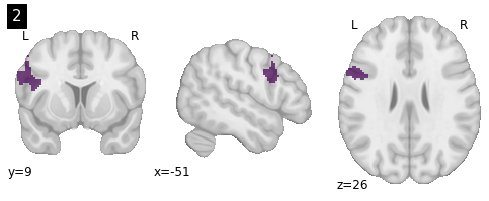

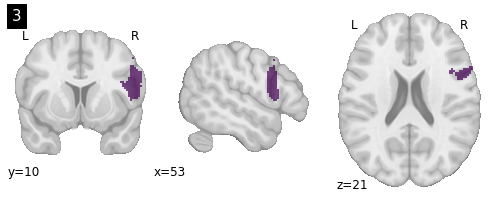

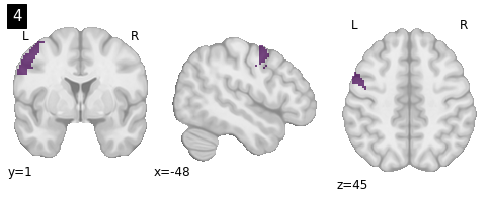

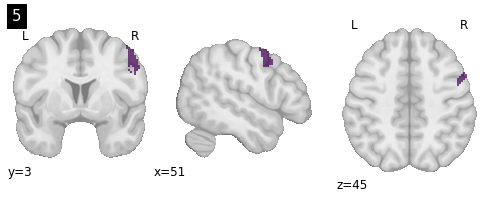

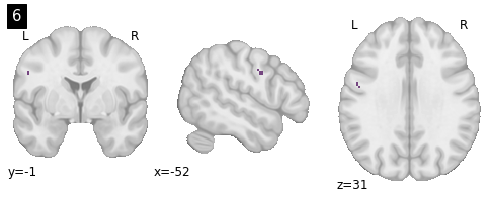

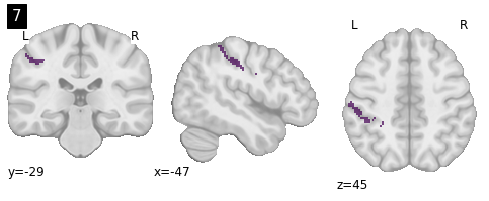

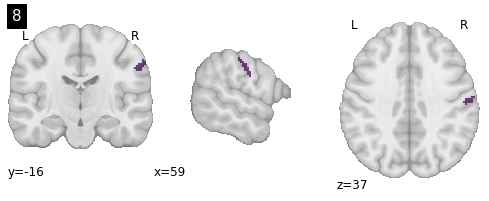

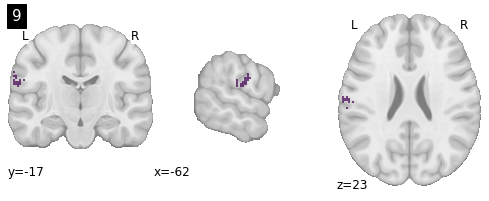

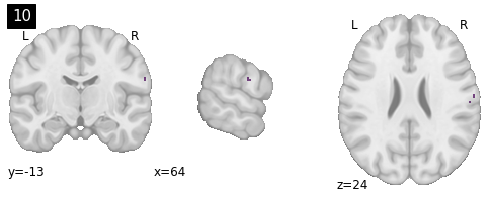

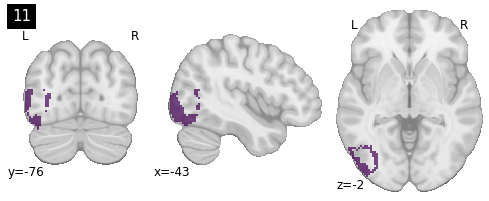

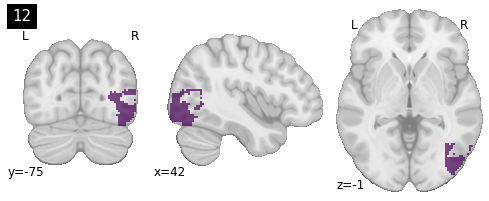

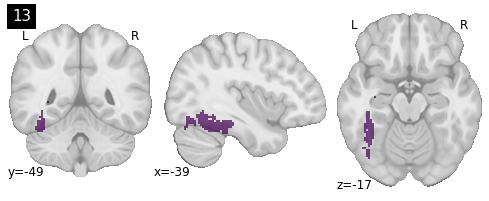

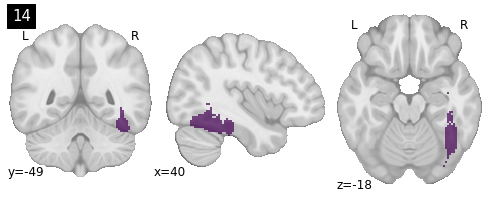

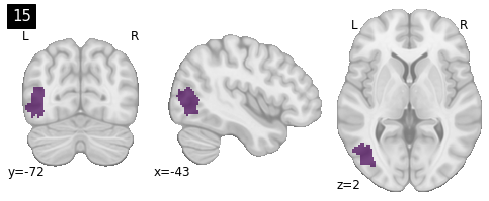

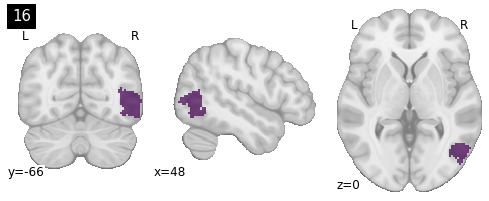

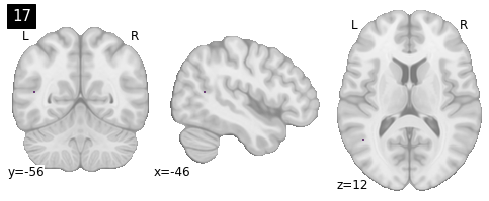

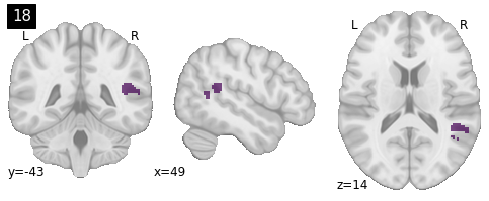

In [8]:
# plot them all
for idx, mask in enumerate(all_masks):
    plotting.plot_roi(mask, title=idx, draw_cross=False, bg_img=template, black_bg=False, cmap="viridis")

Combine them 
- IPL = 1
- IFG = 2
- PM = 3
- M1 = 4
- S1 = 5
- S2 = 6
- LOC = 7
- FUSIFORM = 8
- V5 = 9
- pSTS = 10 

In [9]:
labels = {1:"IPL",
          2:"IFG",
          3:"PM",
          4:"M1",
          5:"S1",
          6:"S2",
          7:"LOC",
          8:"FUSIFORM",
          9:"Area V5",
          10:"pSTS"}

In [10]:
ipl_total = math_img("img1+img2", img1=left_ipl, img2=right_ipl)

ifg_total = math_img("img1+img2", img1=left_ifg, img2=right_ifg)
ifg_total_two = math_img("img*2", img=ifg_total)

pm_total = math_img("img1+img2", img1=left_pm, img2=right_pm)
pm_total_three = math_img("img*3", img = pm_total)

m1_total = nib.load(left_m1)
m1_total_four = math_img("img*4", img = left_m1)

s1_total = math_img("img1+img2", img1=left_s1, img2=right_s1)
s1_total_five = math_img("np.round((img*5),decimals=0)", img = s1_total)

s2_total = math_img("img1+img2", img1=left_s2, img2=right_s2)
s2_total_six = math_img("img*6", img = s2_total)

loc_total = math_img("img1+img2", img1=left_loc, img2=right_loc)
loc_total_seven = math_img("np.round((img*7),decimals=0)", img = loc_total)

fusiform_total = math_img("img1+img2", img1=left_fusiform, img2=right_fusiform)
fusiform_total_eight = math_img("np.round((img*8),decimals=0)", img = fusiform_total)

v5_total = math_img("img1+img2", img1=left_v5, img2=right_v5)
v5_total_nine = math_img("np.round((img*9),decimals=0)", img = v5_total)

pSTS_total = math_img("img1+img2", img1=left_pSTS, img2=right_pSTS)
pSTS_total_ten = math_img("np.round((img*10),decimals=0)", img = pSTS_total)

# and add them up
roi_atlas = math_img("img1+img2+img3+img4+img5+img6+img7+img8+img9+img10", 
                     img1=ipl_total, 
                     img2=ifg_total_two, 
                     img3=pm_total_three, 
                     img4=m1_total_four,
                     img5=s1_total_five,
                     img6=s2_total_six,
                     img7=loc_total_seven,
                     img8=fusiform_total_eight,
                     img9=v5_total_nine,
                     img10=pSTS_total_ten)

In [11]:
# quick sanity check
roi_int_labels = np.unique(roi_atlas.get_fdata())
n_regions = roi_int_labels.size

print(f"There are {n_regions} different regions in the mask! Check here if the mask has eleven discrete values: {roi_int_labels}")

There are 11 different regions in the mask! Check here if the mask has ten discrete values: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


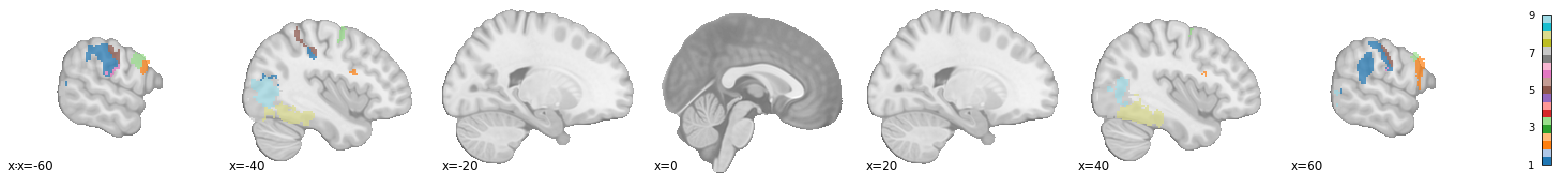

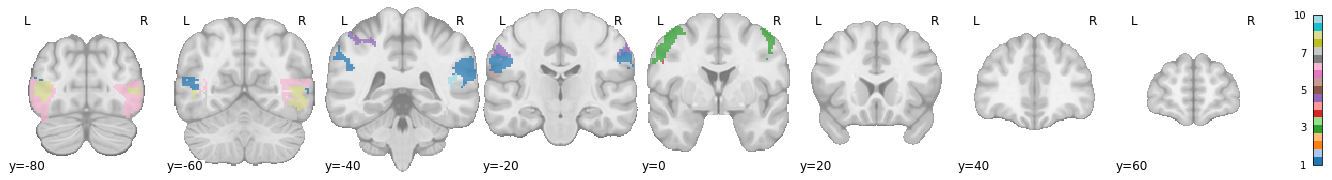

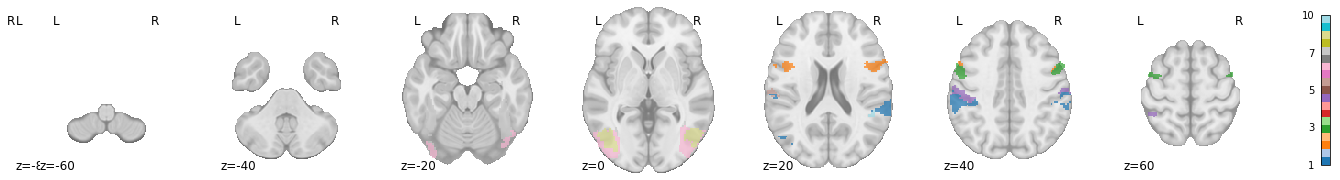

In [12]:
roi_plot_x = plotting.plot_roi(roi_atlas, display_mode = 'x', cut_coords=np.arange(-80,80,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="tab20", colorbar=True)

roi_plot_y = plotting.plot_roi(roi_atlas, display_mode = 'y', cut_coords=np.arange(-80,80,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="tab20", colorbar=True)

roi_plot_z = plotting.plot_roi(roi_atlas, display_mode = 'z', cut_coords=np.arange(-80,80,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="tab20", colorbar=True)

In [13]:
# save the stuff
roi_atlas_path = f"{roi_dir}/all_rois_mask.nii.gz"
roi_atlas.to_filename(roi_atlas_path)

----------
**Do the same but just with the total FB and total AON masks**

In [30]:
fb_two = math_img("np.round((img*2), decimals=0)", img=all_fb_anat)

In [15]:
fb_ao_combined = math_img("np.round((img1+img2), decimals=0)", img1=all_aon_anat, img2=fb_two)

In [16]:
# quick sanity check
fb_ao_int_labels = np.unique(fb_ao_combined.get_fdata())
n_regions = fb_ao_int_labels.size

print(f"There are {n_regions} different regions in the mask! Check here if the mask has two discrete values: {fb_ao_int_labels}")

There are 4 different regions in the mask! Check here if the mask has two discrete values: [0. 1. 2. 3.]


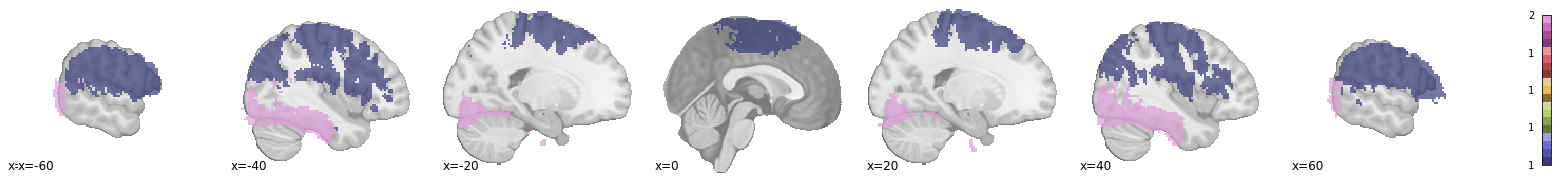

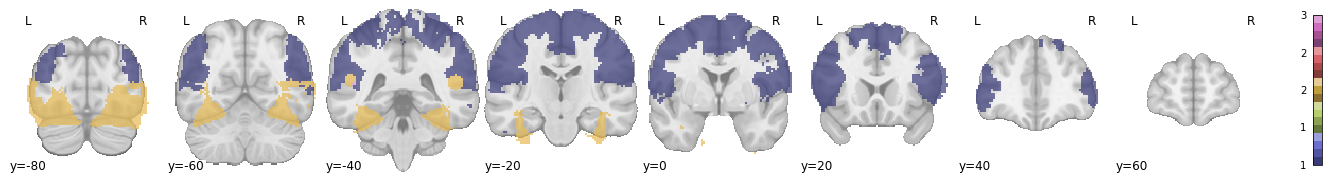

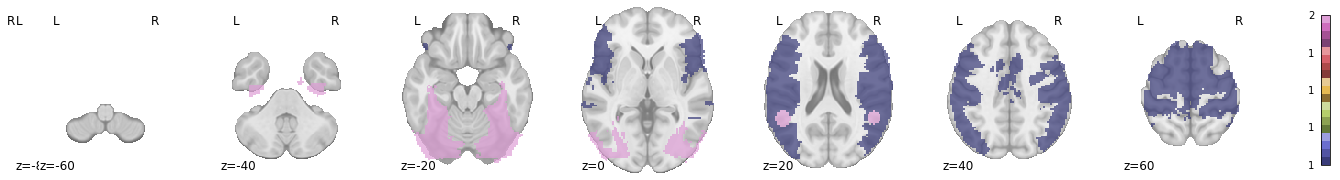

In [17]:
fb_ao_plot_x = plotting.plot_roi(fb_ao_combined, display_mode = 'x', cut_coords=np.arange(-80,80,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="tab20b", colorbar=True)

fb_ao_plot_y = plotting.plot_roi(fb_ao_combined, display_mode = 'y', cut_coords=np.arange(-80,80,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="tab20b", colorbar=True)

fb_ao_plot_z = plotting.plot_roi(fb_ao_combined, display_mode = 'z', cut_coords=np.arange(-80,80,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="tab20b", colorbar=True)

----
Quick overlap check 

In [18]:
def MyOverlapCalculator(mask1, mask2):
    # load mask data
    mask1_data = mask1.get_fdata()
    mask2_data = mask2.get_fdata()
    
    # plot both masks
    plot = plotting.plot_roi(mask1, draw_cross=False, display_mode = 'x', cut_coords=np.arange(-80,80,20), bg_img=template, black_bg=False, cmap="viridis", alpha=0.7)
    plot.add_contours(mask2, filled=False, alpha=1, colors="k")
    
    # calculate the number of overlapping voxels
    overlap = np.sum((mask1_data > 0) & (mask2_data > 0))
    print("Number of overlapping voxels:", overlap)

- IPL = 1
- IFG = 2
- PM = 3
- M1 = 4
- S1 = 5
- S2 = 6
- LOC = 7
- FUSIFORM = 8
- V5 = 9
- pSTS = 10 

/usr/local/lib/python3.8/dist-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


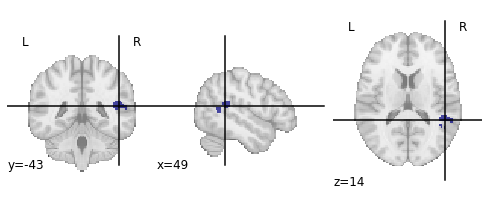

In [19]:
plotting.plot_roi(pSTS_total)

/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.8/dist-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0


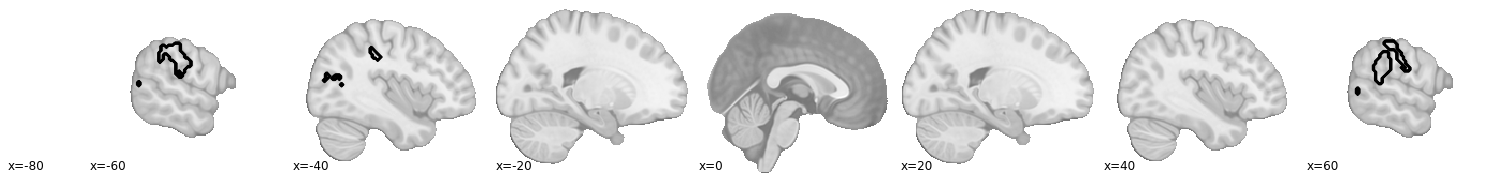

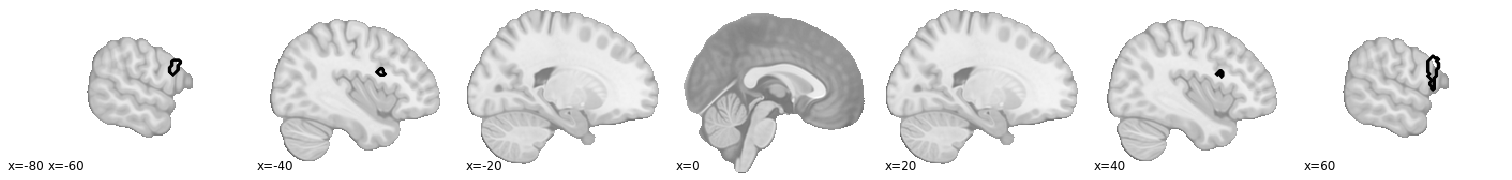

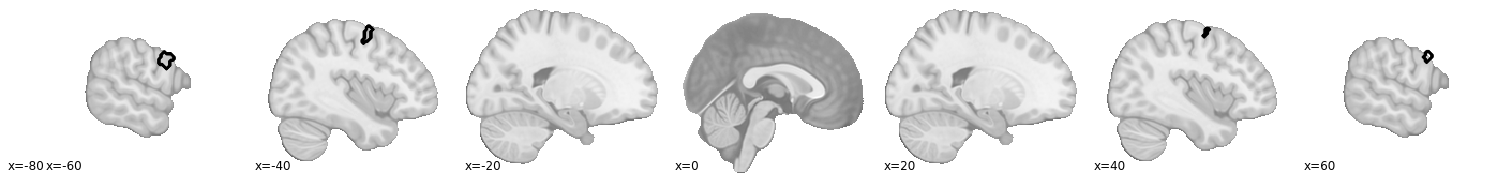

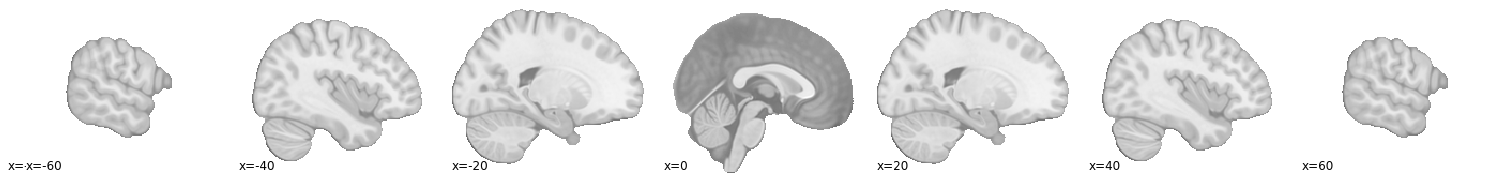

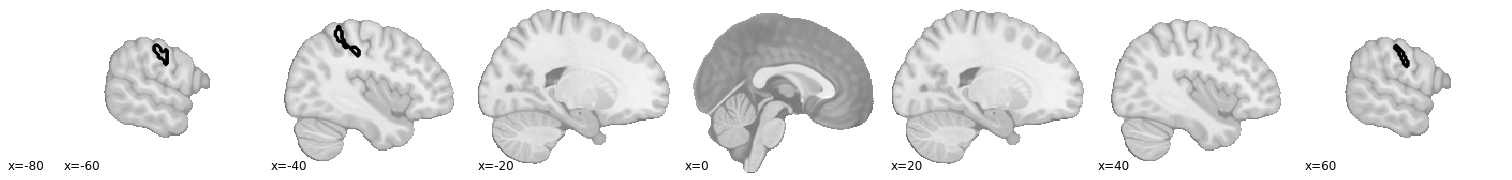

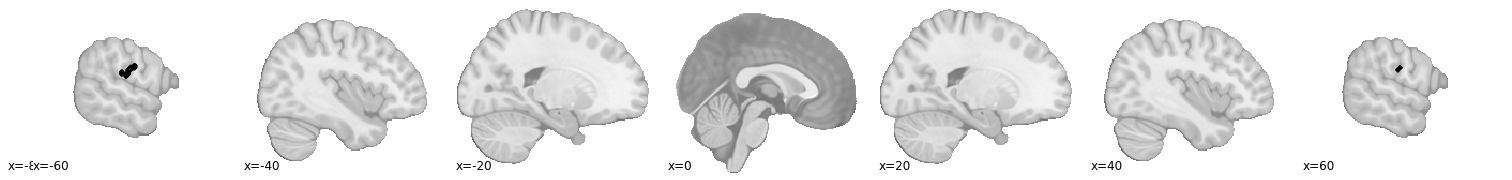

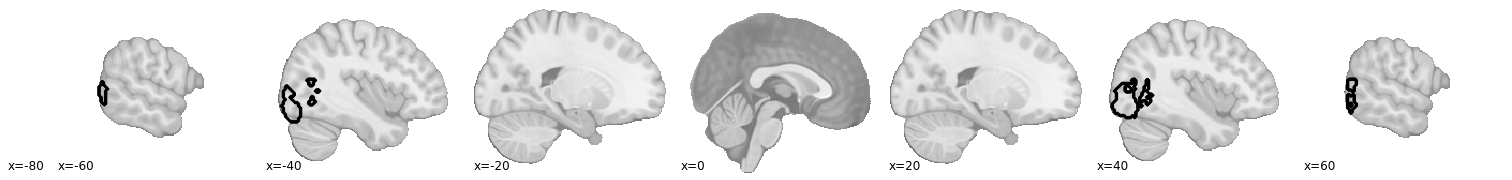

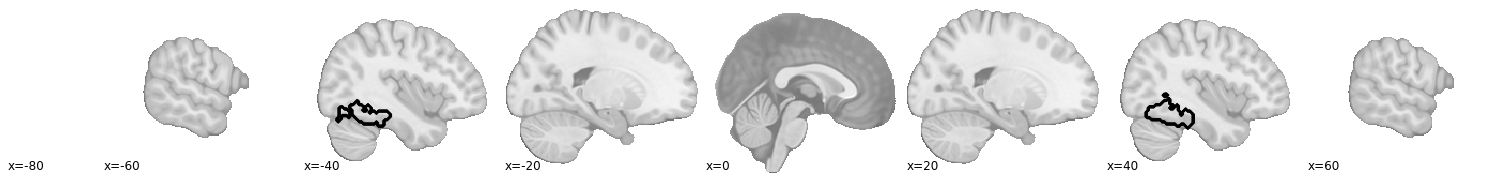

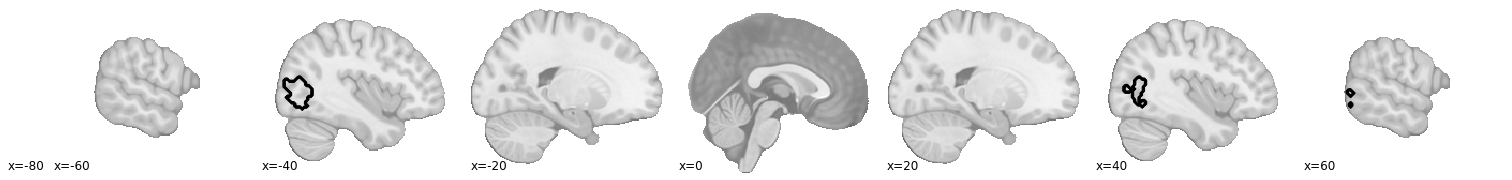

In [20]:
MyOverlapCalculator(pSTS_total, ipl_total)
MyOverlapCalculator(pSTS_total, ifg_total)
MyOverlapCalculator(pSTS_total, pm_total)
MyOverlapCalculator(pSTS_total, m1_total)
MyOverlapCalculator(pSTS_total, s1_total)
MyOverlapCalculator(pSTS_total, s2_total)
MyOverlapCalculator(pSTS_total, loc_total)
MyOverlapCalculator(pSTS_total, fusiform_total)
MyOverlapCalculator(pSTS_total, v5_total)

Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0


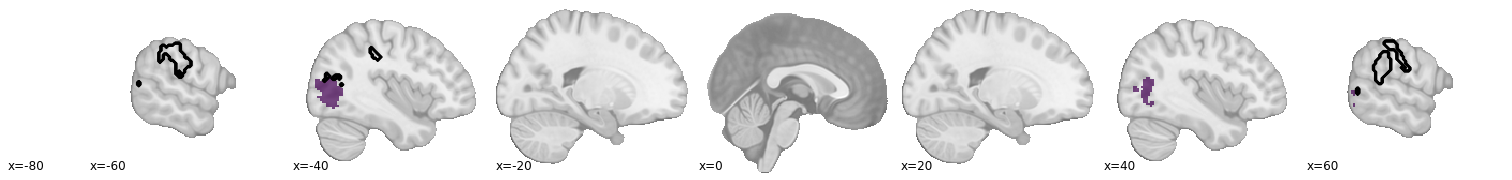

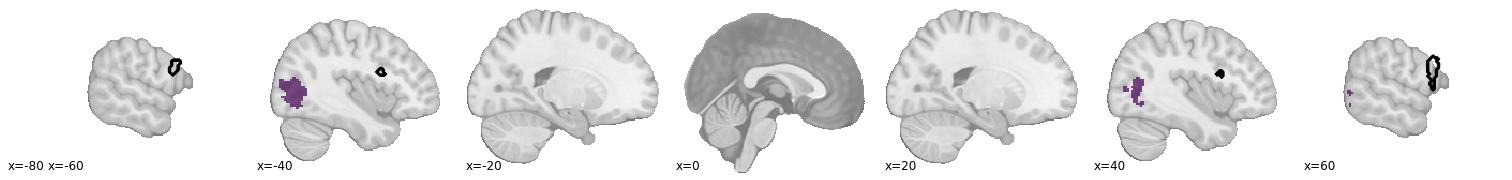

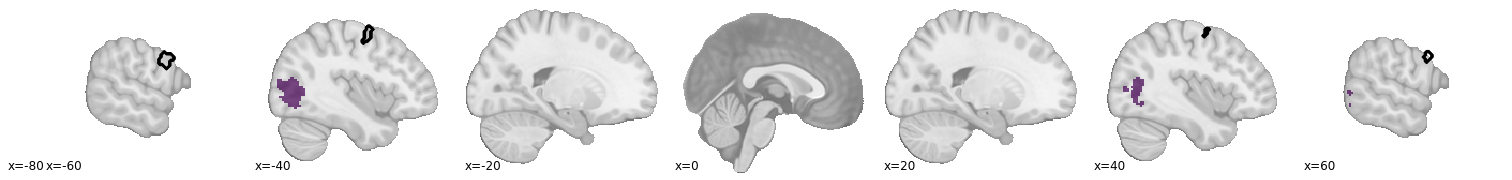

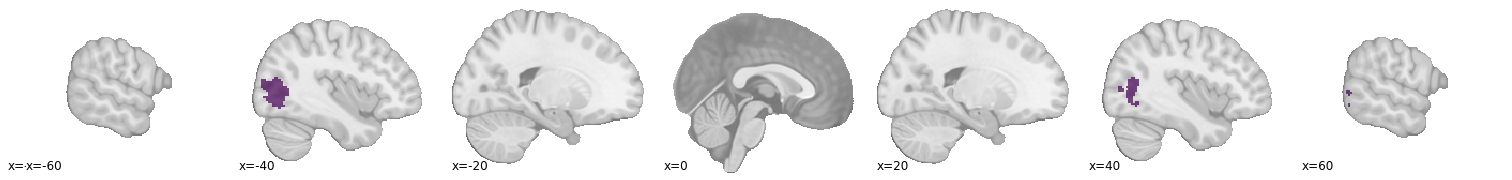

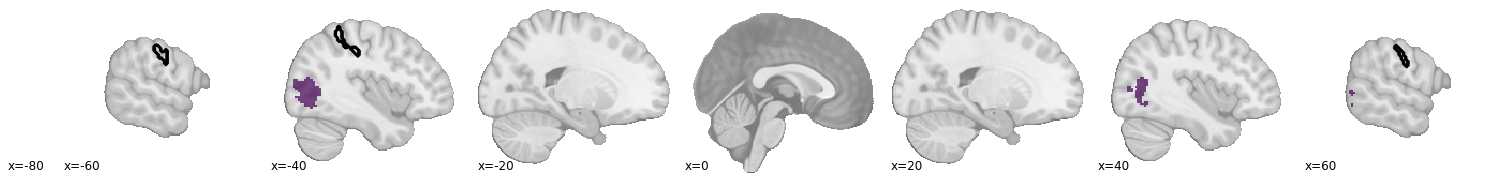

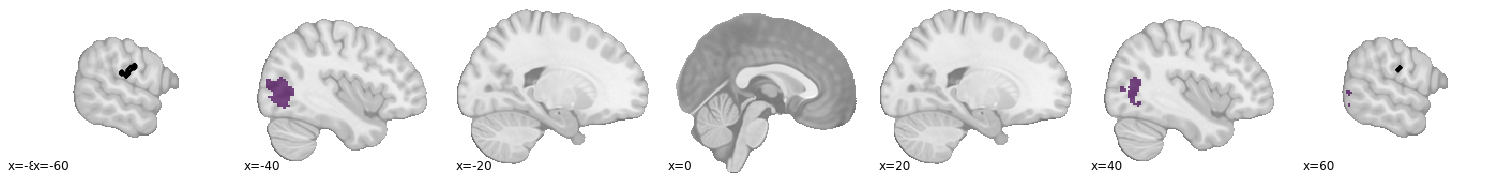

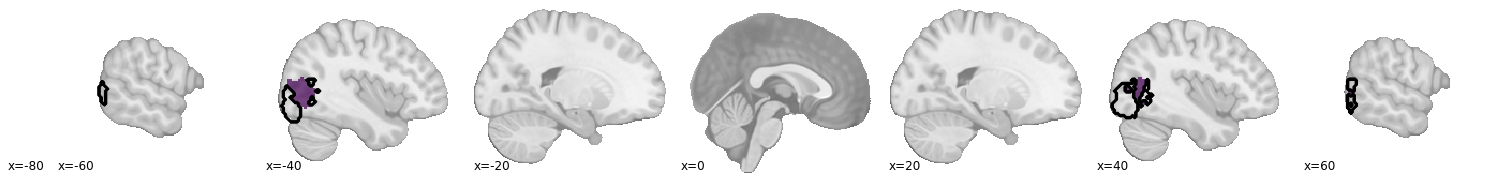

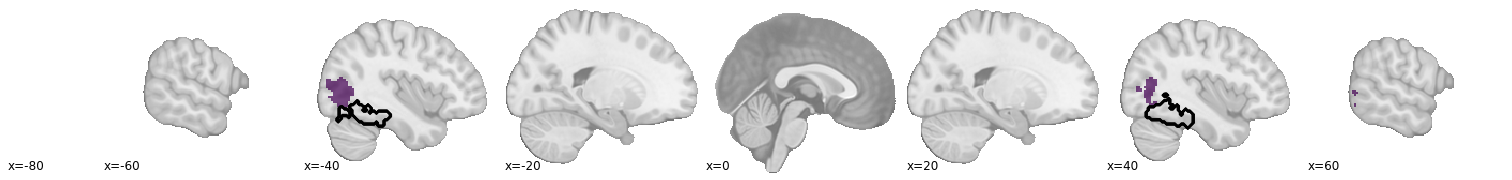

In [21]:
MyOverlapCalculator(v5_total, ipl_total)
MyOverlapCalculator(v5_total, ifg_total)
MyOverlapCalculator(v5_total, pm_total)
MyOverlapCalculator(v5_total, m1_total)
MyOverlapCalculator(v5_total, s1_total)
MyOverlapCalculator(v5_total, s2_total)
MyOverlapCalculator(v5_total, loc_total)
MyOverlapCalculator(v5_total, fusiform_total)

Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0


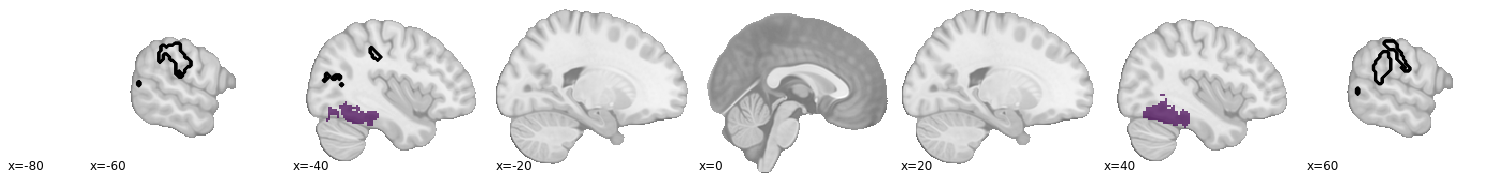

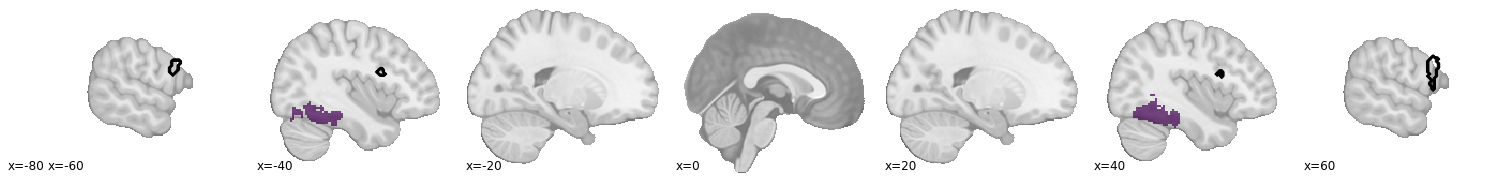

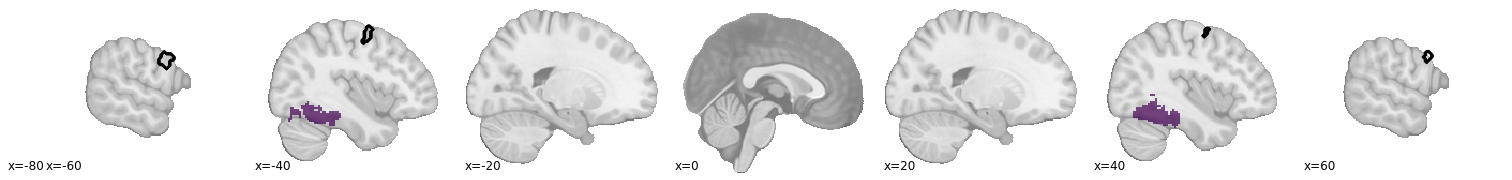

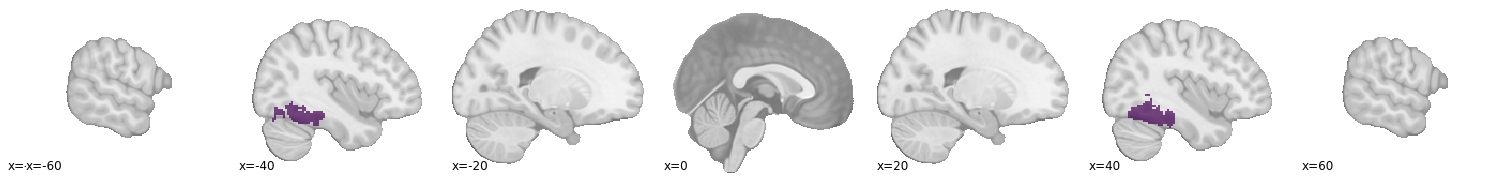

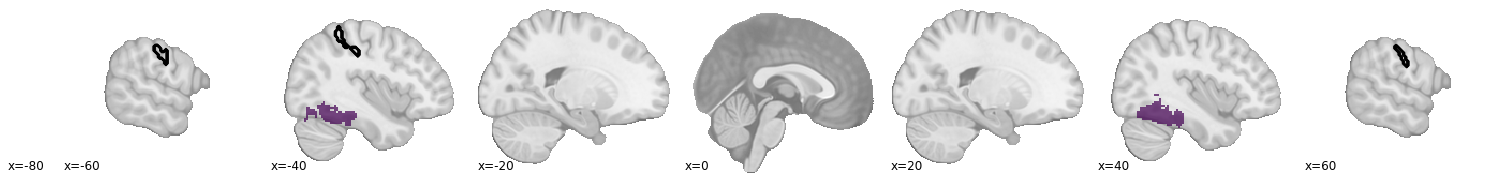

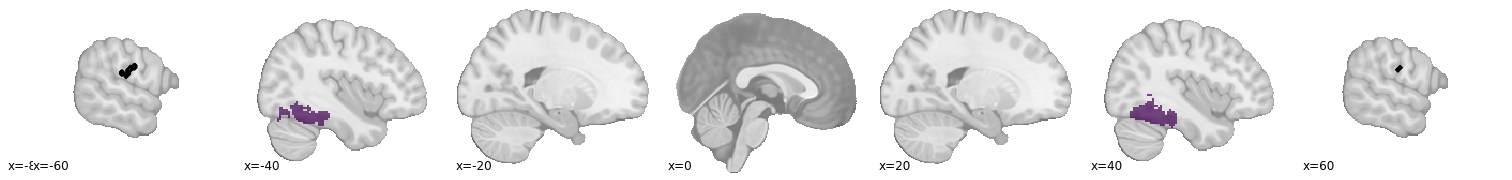

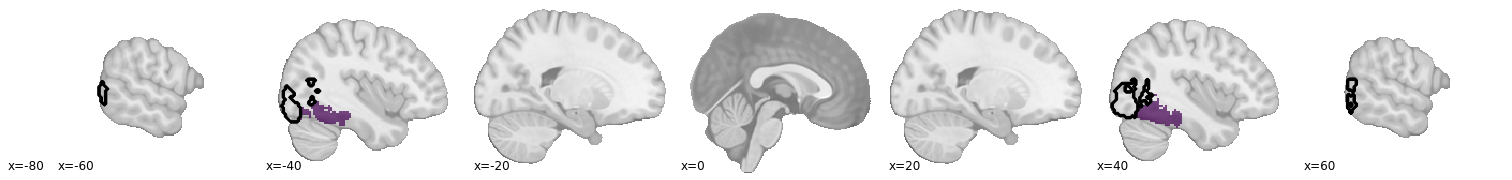

In [22]:
MyOverlapCalculator(fusiform_total, ipl_total)
MyOverlapCalculator(fusiform_total, ifg_total)
MyOverlapCalculator(fusiform_total, pm_total)
MyOverlapCalculator(fusiform_total, m1_total)
MyOverlapCalculator(fusiform_total, s1_total)
MyOverlapCalculator(fusiform_total, s2_total)
MyOverlapCalculator(fusiform_total, loc_total)

Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0


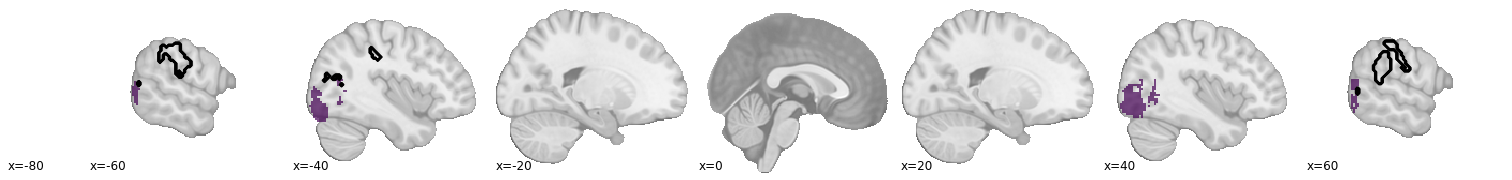

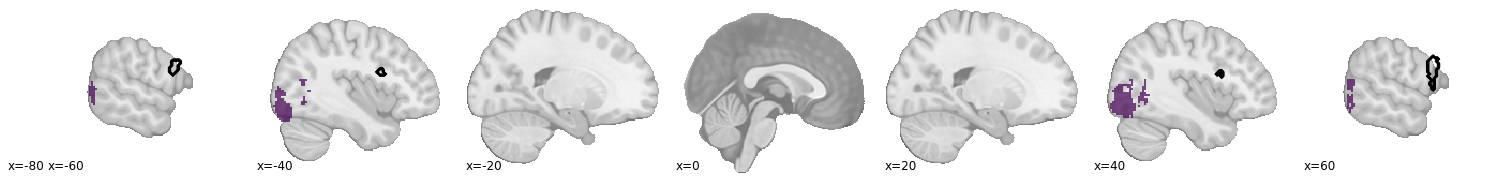

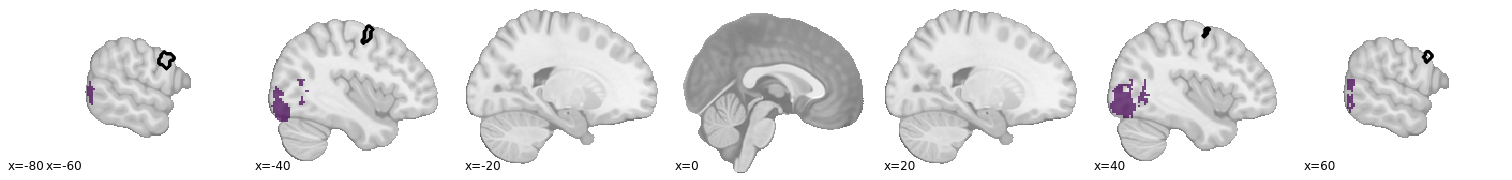

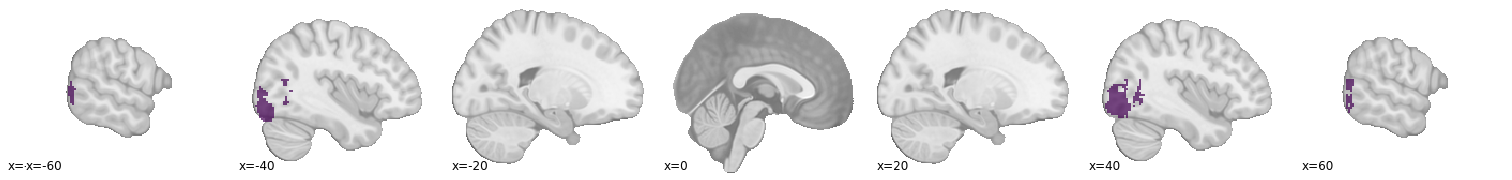

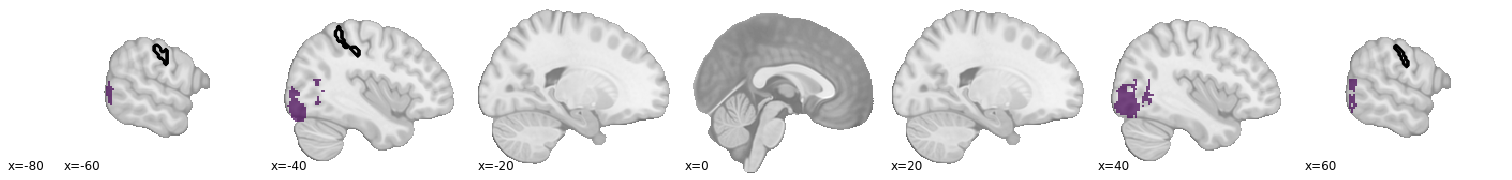

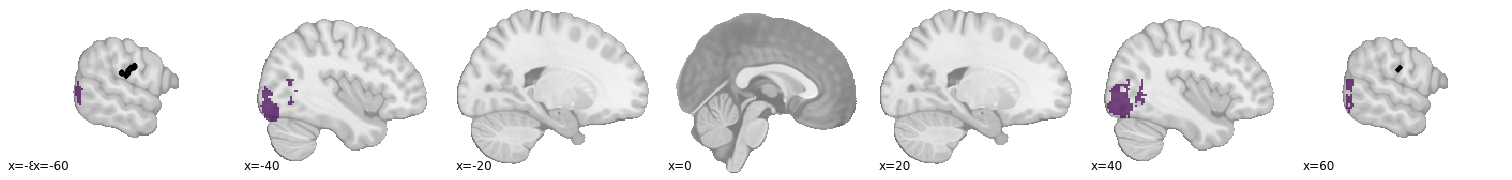

In [23]:
MyOverlapCalculator(loc_total, ipl_total)
MyOverlapCalculator(loc_total, ifg_total)
MyOverlapCalculator(loc_total, pm_total)
MyOverlapCalculator(loc_total, m1_total)
MyOverlapCalculator(loc_total, s1_total)
MyOverlapCalculator(loc_total, s2_total)

Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0


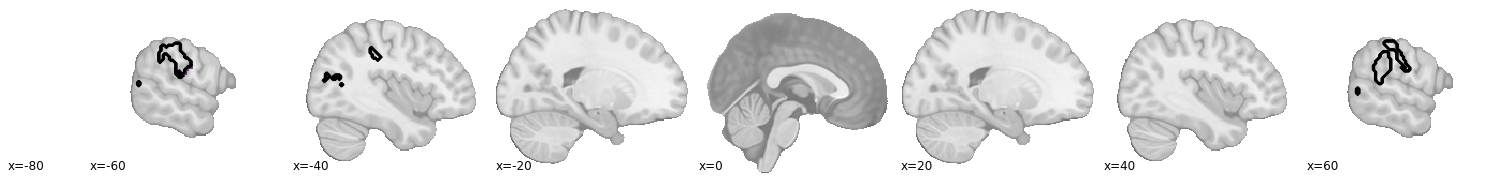

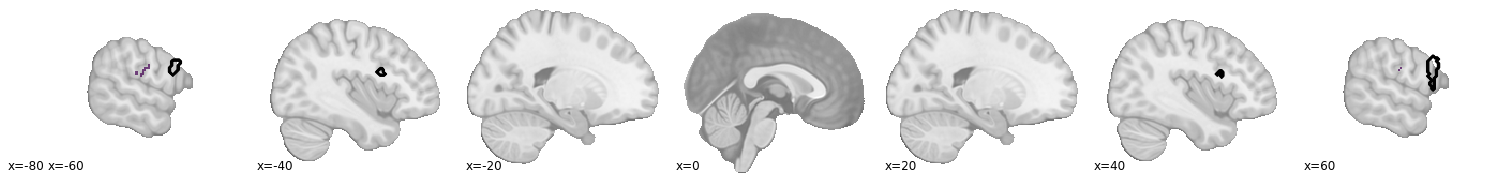

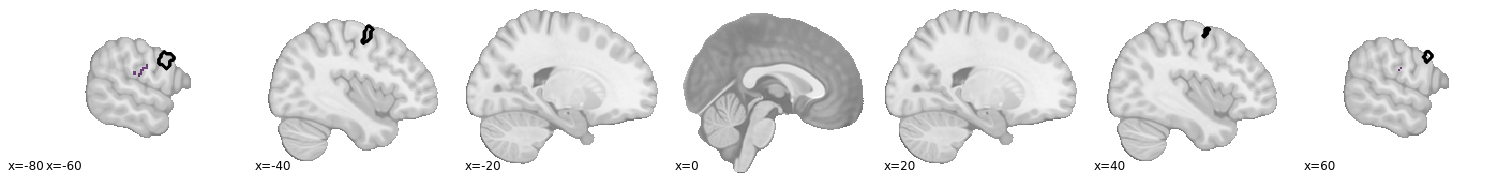

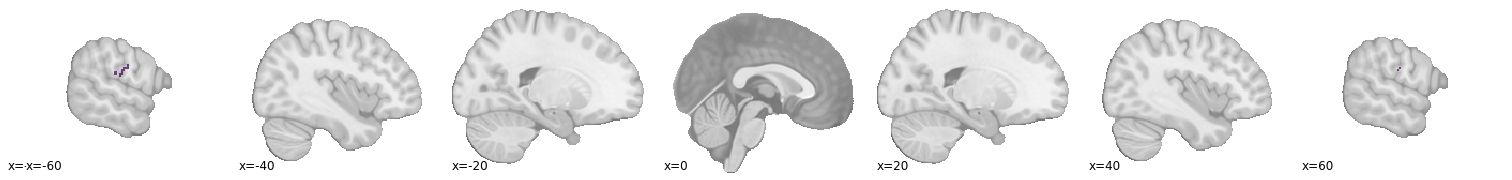

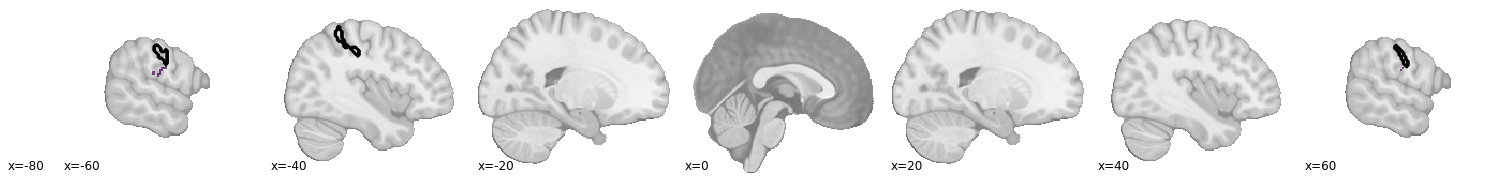

In [24]:
MyOverlapCalculator(s2_total, ipl_total)
MyOverlapCalculator(s2_total, ifg_total)
MyOverlapCalculator(s2_total, pm_total)
MyOverlapCalculator(s2_total, m1_total)
MyOverlapCalculator(s2_total, s1_total)

Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0


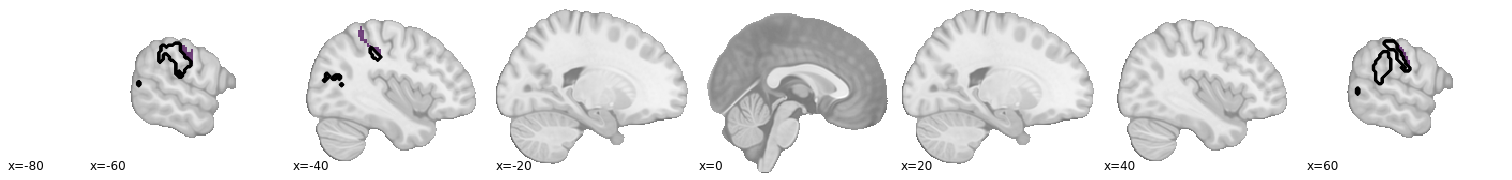

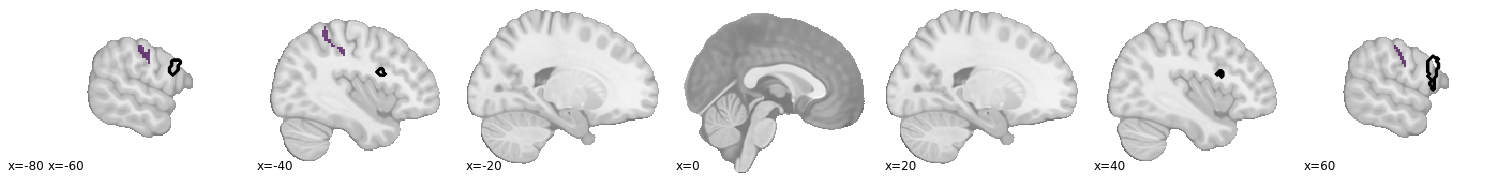

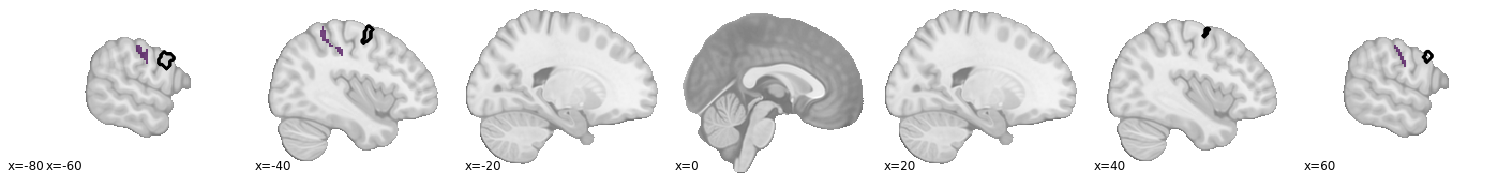

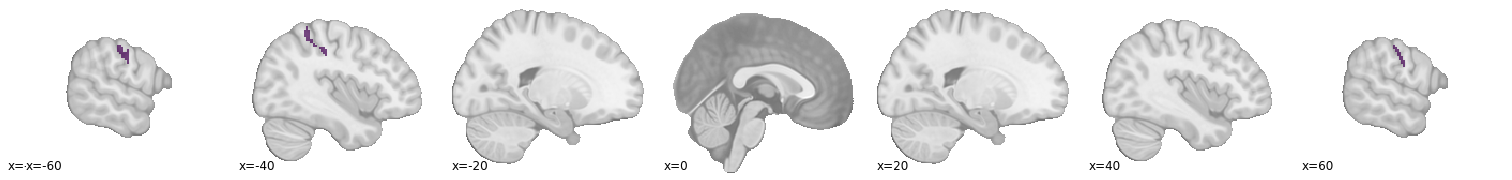

In [25]:
MyOverlapCalculator(s1_total, ipl_total)
MyOverlapCalculator(s1_total, ifg_total)
MyOverlapCalculator(s1_total, pm_total)
MyOverlapCalculator(s1_total, m1_total)

Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0


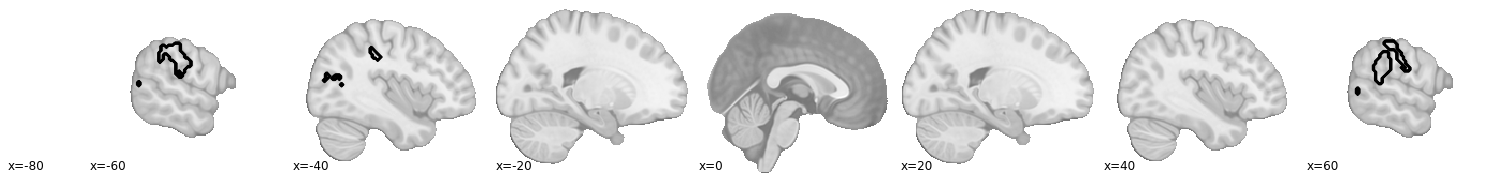

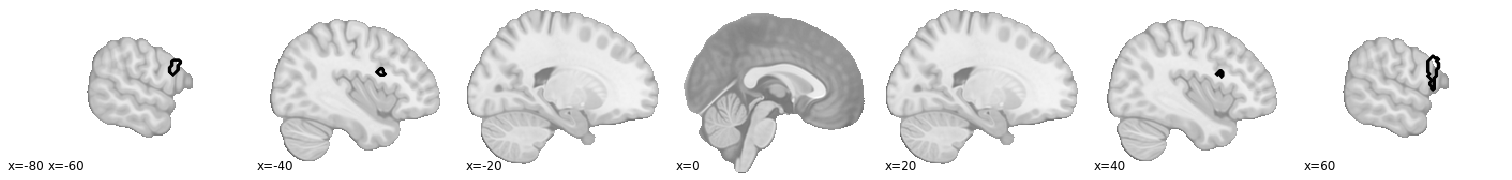

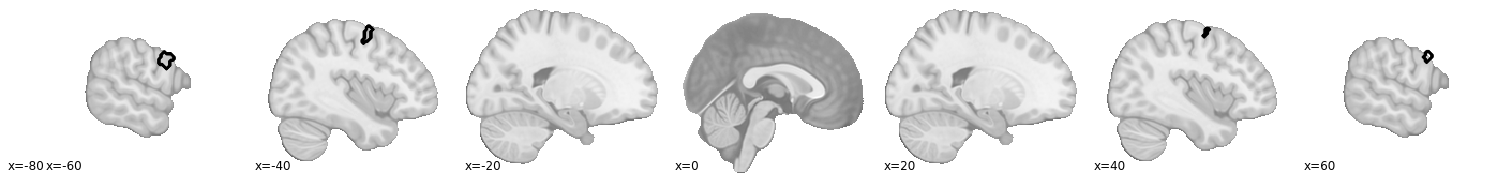

In [26]:
MyOverlapCalculator(m1_total, ipl_total)
MyOverlapCalculator(m1_total, ifg_total)
MyOverlapCalculator(m1_total, pm_total)

Number of overlapping voxels: 0
Number of overlapping voxels: 0


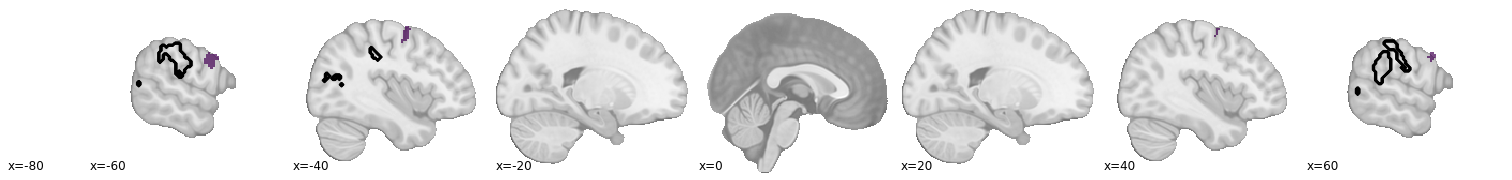

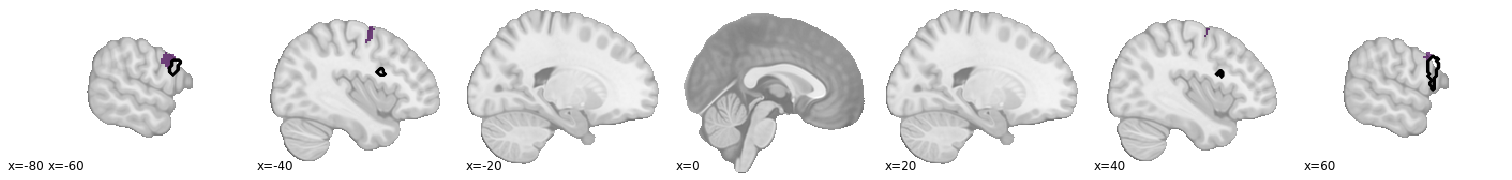

In [27]:
MyOverlapCalculator(pm_total, ipl_total)
MyOverlapCalculator(pm_total, ifg_total)

Number of overlapping voxels: 0


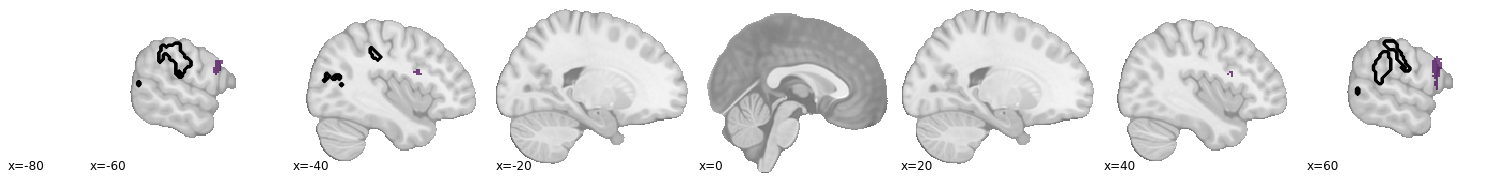

In [28]:
MyOverlapCalculator(ifg_total, ipl_total)

------------------
